In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_X_data = pd.read_csv('/Users/fangweilin/Desktop/660HW12/x_train.csv')                       # extract data from text
train_y_data = pd.read_csv('/Users/fangweilin/Desktop/660HW12/y_train.csv', names=['Class'])
test_X_data = pd.read_csv('/Users/fangweilin/Desktop/660HW12/x_test.csv')
test_y_data = pd.read_csv('/Users/fangweilin/Desktop/660HW12/y_test.csv', names=['Class'])

train_X_frame = DataFrame(train_X_data)                           # create a dataframe
train_y_frame = DataFrame(train_y_data)
train_y_frame = pd.get_dummies(train_y_frame)                     # change class into hotcoding

test_X_frame = DataFrame(test_X_data)
test_y_frame = DataFrame(test_y_data)
test_y_frame = pd.get_dummies(test_y_frame)                       # change class into hotcoding
test_y_frame['Class_ERL'] = 0                                    #  Because the test data lacks 'ERL', we add an all 0 column to get a same format as train data.
test_y_frame.insert(1,'Class_ERL',test_y_frame.pop('Class_ERL'))

[[0.1248503 ]
 [0.20958084]
 [0.05568862]
 [0.09580838]
 [0.03562874]
 [0.05808383]
 [0.02754491]
 [0.04371257]
 [0.02155689]
 [0.03143713]
 [0.01497006]
 [0.0242515 ]
 [0.01257485]
 [0.01946108]
 [0.01017964]
 [0.01257485]
 [0.00778443]
 [0.01377246]
 [0.00958084]
 [0.00868263]
 [0.00628743]
 [0.00838323]
 [0.00449102]
 [0.00748503]
 [0.00419162]
 [0.00898204]
 [0.00419162]
 [0.00449102]
 [0.00359281]
 [0.00568862]]
[[0.57479339]
 [0.74049587]
 [0.57438017]
 [0.68491736]
 [0.56528926]
 [0.64214876]
 [0.59318182]
 [0.62809917]
 [0.57004132]
 [0.62252066]
 [0.56735537]
 [0.62727273]
 [0.58842975]
 [0.61549587]
 [0.57933884]
 [0.62561983]
 [0.58822314]
 [0.6196281 ]
 [0.58243802]
 [0.59008264]
 [0.60392562]
 [0.61404959]
 [0.57355372]
 [0.5803719 ]
 [0.58657025]
 [0.62417355]
 [0.56301653]
 [0.5911157 ]
 [0.56735537]
 [0.5964876 ]]


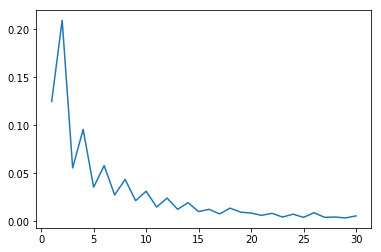

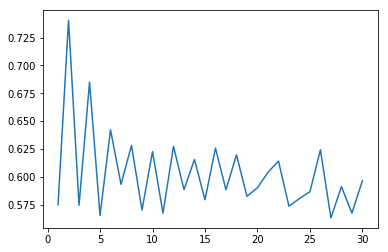

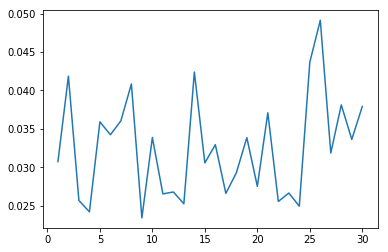

In [3]:
train_error_arr = np.zeros(shape=(30, 1))                         # create a all zero array
test_error_arr = np.zeros(shape=(30, 1))                          # create a all zero array
test_std_arr = np.zeros(shape=(30, 1))                            # create a all zero array

for tree_num in range(1,31):
    train_error = 0
    test_error = 0
    test_error_sep = np.zeros(shape=(10, 1))                      # create a all zero array
    for i in range(10):
        train_frame = pd.concat([train_X_frame, train_y_frame], axis=1)                                                   # combine feature X and Class y
        t_frame,bag_frame = train_test_split(train_frame,test_size=1/3)                                                   # create a smaller training set, "bag", which is 1/3 of training data
        bagging_frame = resample(bag_frame, n_samples=334, random_state=0)                                                # randomly sampling from "bag" with replacement
        bag_X_frame = bagging_frame.iloc[:, 0:8]
        bag_y_frame = bagging_frame.iloc[:, 8:]
        RandomForest_model = RandomForestClassifier(n_estimators=tree_num, bootstrap=True, max_features=3)
        RandomForest_model.fit(bag_X_frame,bag_y_frame)
        train_error = train_error + 1 - RandomForest_model.score(bag_X_frame,bag_y_frame)
        test_error = test_error + 1 - RandomForest_model.score(test_X_frame,test_y_frame)
        test_error_sep[i] = 1 - RandomForest_model.score(test_X_frame,test_y_frame)
    train_error_arr[tree_num-1] = train_error/10
    test_error_arr[tree_num-1] = test_error/10
    test_std_arr[tree_num-1] = np.std(test_error_sep, ddof = 1)
print(train_error_arr)
print(test_error_arr)


tree = np.zeros(shape=(30, 1))                         # create a all zero array
for tree_num in range(1,31):
    tree[tree_num-1] = tree_num
plt.plot(tree,train_error_arr)
plt.show()
plt.plot(tree,test_error_arr)
plt.show()
plt.plot(tree,test_std_arr)
plt.show()